<div style="text-align: center;" class="markdown-google-sans">
  <h1><font size=6>Assignment 1</font></h1>

  <u>Group members:</u><br>
  - Ariel Hedvat<br>
  - Shiraz Israeli<br>
  - Yuval Bakirov<br>
  - Eitan Bakirov

<br>

In this project we are aiming to build an accurate model to predict daily bicycle rental demand using the provided bike sharing dataset. By analyzing the data and testing different modeling techniques, we will develop a robust model optimized to forecast the rental count metric on a held-out test set.<br>
The goal is to create a reliable demand prediction model for bike sharing operations.
</div>




*   כדאי להשתמש במודלים מבוססי עצים: xgboost, random forest
*   להעלות את המחברת לגיט האב ולשים את הקישור בתיבת הגשה וגם את הסי-אס-וי








<div style="text-align: center;" class="markdown-google-sans">
  <h1><font size=5>Data</font></h1>
</div>

`train.csv` and `test.csv` - contain information on bike rentals, including the timestamp, seasonal indicators, holiday and working day flags, weather conditions, temperature metrics, humidity, windspeed, pollution, sunlight, traffic, and the count of bikes rented at each recorded time.<br>
Target variable to predict is "count" (Label).<br><br>


למחוק לפני הגשה:<br>

---


<u>datetime</u> - time of rental<br>
<u>season</u> - (1:winter, 2:spring, 3:summer, 4:fall)<br>
<u>holiday</u> - (Is it a bank holiday? If so: 1, else 0)<br>
<u>workingday</u> - (Is it a working day? If so: 1, else 0)<br>
<u>weather</u>
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

<u>temp</u> - temperature <br>
<u>atemp</u> - average temperature <br>


---


<div class="markdown-google-sans">
  <h1><font size=5>Table of Contents</font></h1>

>>[Import Libraries](#scrollTo=-_VBJ0JlYLKI)

>>[Loading the data](#scrollTo=kXwOL606ZfUN)

>>[Exploring The Data](#scrollTo=P8cTl07AZgyg)

>>[Preprocessing](#scrollTo=E_OOmtAYZnm7)

>>>[Handling Missing Values](#scrollTo=4A8VA3nRwiB7)

>>>[Add New Features](#scrollTo=96lau3rN1OpT)

>>>[Handling Categorial Features](#scrollTo=xtPSG9CixFck)

>>>[Handling Outliers](#scrollTo=zxs7JyHhxIoa)

>>>[Large Dimensionality](#scrollTo=A7NVDhWSxUTO)

>>>>>[How will we recognize that the dimensions of the problem are too large?](#scrollTo=bjEa7ZgqOuvD)

>>>[Data Normalizing](#scrollTo=NiFHiz6MxXGT)

>>>[Dimensionality Reduction](#scrollTo=iaFEPiItxaqq)

>>>[Final Preprocessing Function](#scrollTo=6TXc09TPPJe0)

>>[Running the Models](#scrollTo=PujsQcU7Zw5v)

>>[Evaluation of the Models](#scrollTo=qbvc7vxiZ5fC)

>>[Prediction](#scrollTo=dE4SF0VdaENB)

>>[Output](#scrollTo=IJrSf6hnWnCJ)



##  Import Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn as skl
import seaborn as sns
import os

from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import math

#from google.colab import drive
#drive.mount('/content/drive')

import pandas as pd

import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [3]:
# Data Loading
#full_train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignments/Assignment I/train.csv') # TO DELETE
url = 'https://raw.githubusercontent.com/ariel-hedvat/AdvancedMLDLCourseAssignments/main/Assignment%20I/train.csv'
full_train_data = pd.read_csv(url)

train_with_labels = full_train_data.copy()
train_data = full_train_data.drop('count', axis=1).copy()
train_labels = full_train_data['count'].copy()

## Exploring The Data

In [4]:
train_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pollution,sunlight,traffic
0,2011-07-11 00:00:00,3,0,1,1,28.70,32.575,65,12.9980,5.354100,28.701,0.000000
1,2012-05-18 22:00:00,2,0,1,1,22.96,26.515,52,22.0028,85.425233,22.961,0.004489
2,2011-04-01 23:00:00,2,0,1,1,12.30,15.910,61,6.0032,2.040899,12.301,0.000242
3,2012-09-16 09:00:00,3,0,0,1,23.78,27.275,60,8.9981,26.682772,23.781,0.004489
4,2011-02-01 23:00:00,1,0,1,3,8.20,9.850,93,12.9980,5.851754,8.201,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
8159,2012-01-14 02:00:00,1,0,0,1,6.56,8.335,47,11.0014,14.953355,6.561,0.004489
8160,2011-12-10 09:00:00,4,0,0,1,11.48,12.880,61,19.0012,7.977025,11.481,0.000000
8161,2011-12-18 16:00:00,4,0,0,1,11.48,13.635,48,16.9979,6.916512,11.481,0.015615
8162,2011-02-19 07:00:00,1,0,0,1,15.58,19.695,17,35.0008,0.095445,15.581,0.000242


In [5]:
train_data.shape

(8164, 12)

In [6]:
train_data = train_data.drop_duplicates()

In [7]:
train_data.shape

(8164, 12)

In [8]:
train_data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
pollution     float64
sunlight      float64
traffic       float64
dtype: object

from looking at the data we know that....

In [9]:
# Get the summary statistics of the features
print("\nSummary statistics of the features:")
train_data.describe()


Summary statistics of the features:


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pollution,sunlight,traffic
count,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000
mean,2.510289,0.029397,0.683244,1.415483,20.244980,23.670160,61.835130,12.791334,47.152120,20.245980,0.004986
std,1.117178,0.168928,0.465240,0.631242,7.796018,8.468725,19.255791,8.213914,72.882602,7.796018,0.006319
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000304,0.821000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,7.001500,3.693188,13.941000,0.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,17.684113,20.501000,0.000242
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,59.257746,26.241000,0.004489
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,754.304876,41.001000,0.015615


In [11]:
# Assuming your data is in a DataFrame called df
null_check = train_data.isnull().sum()
print(null_check)

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
pollution     0
sunlight      0
traffic       0
dtype: int64


Now we would like to understand how the features are structured. <br>
Are the values in each feature repeated ...? What a common values in every feature ...? Is an attribute a representative attribute with different values ...?

In [12]:
for column in train_data.columns:
    categories = train_data[column].value_counts()
    print(f"Categories in column '{column}':")
    display(categories)
    # Noting when the categories are unique.
    if len(categories) == train_data.shape[0]:
        print("Each category is different.")
        print("")

Categories in column 'datetime':


2011-07-11 00:00:00    1
2012-05-10 23:00:00    1
2012-09-11 12:00:00    1
2011-01-17 14:00:00    1
2012-11-06 04:00:00    1
                      ..
2011-07-12 11:00:00    1
2011-10-12 00:00:00    1
2012-01-04 07:00:00    1
2012-04-13 22:00:00    1
2012-05-02 07:00:00    1
Name: datetime, Length: 8164, dtype: int64

Each category is different.

Categories in column 'season':


4    2067
2    2051
3    2039
1    2007
Name: season, dtype: int64

Categories in column 'holiday':


0    7924
1     240
Name: holiday, dtype: int64

Categories in column 'workingday':


1    5578
0    2586
Name: workingday, dtype: int64

Categories in column 'weather':


1    5406
2    2125
3     632
4       1
Name: weather, dtype: int64

Categories in column 'temp':


14.76    351
26.24    344
18.86    317
28.70    313
13.94    308
22.14    308
22.96    304
12.30    300
24.60    300
27.06    297
25.42    295
16.40    286
29.52    270
13.12    270
21.32    266
17.22    265
10.66    259
20.50    252
18.04    241
30.34    218
9.84     209
15.58    181
9.02     180
31.16    176
8.20     169
27.88    168
32.80    146
23.78    146
11.48    140
19.68    131
6.56     109
33.62     97
5.74      87
7.38      77
31.98     75
35.26     60
34.44     58
4.92      41
36.90     37
4.10      34
37.72     27
36.08     21
3.28       9
38.54      7
0.82       6
39.36      5
2.46       2
1.64       1
41.00      1
Name: temp, dtype: int64

Categories in column 'atemp':


31.060    506
25.760    325
22.725    317
26.515    304
16.665    292
20.455    286
25.000    269
21.210    265
33.335    261
30.305    256
15.150    256
24.240    252
21.970    241
17.425    232
31.820    228
34.850    217
14.395    207
27.275    205
32.575    204
29.545    204
11.365    194
15.910    191
13.635    189
12.880    183
19.695    181
34.090    160
12.120    157
23.485    131
28.790    125
10.605    119
35.605    118
9.850      98
18.180     94
36.365     93
37.120     92
9.090      78
37.880     75
28.030     59
7.575      59
38.635     55
6.060      49
39.395     46
6.820      46
8.335      41
40.910     34
18.940     33
40.150     31
5.305      20
42.425     20
41.665     18
3.790      11
4.545       8
3.030       6
2.275       6
43.180      6
43.940      6
44.695      2
45.455      1
1.515       1
0.760       1
Name: atemp, dtype: int64

Categories in column 'humidity':


88    292
94    238
83    227
87    215
65    197
     ... 
13      1
97      1
10      1
12      1
14      1
Name: humidity, Length: 87, dtype: int64

Categories in column 'windspeed':


0.0000     1000
11.0014     819
8.9981      816
12.9980     783
7.0015      753
15.0013     693
6.0032      675
16.9979     632
19.0012     504
19.9995     359
22.0028     283
23.9994     200
26.0027     174
27.9993     148
30.0026      81
31.0009      69
32.9975      59
35.0008      46
39.0007      21
36.9974      19
40.9973       9
43.9989       7
43.0006       7
56.9969       2
47.9988       2
50.0021       1
46.0022       1
51.9987       1
Name: windspeed, dtype: int64

Categories in column 'pollution':


5.354100     1
37.984932    1
12.358278    1
13.664858    1
0.092407     1
            ..
51.134165    1
5.178513     1
3.214959     1
21.849634    1
81.965417    1
Name: pollution, Length: 8164, dtype: int64

Each category is different.

Categories in column 'sunlight':


14.761    351
26.241    344
18.861    317
28.701    313
13.941    308
22.141    308
22.961    304
12.301    300
24.601    300
27.061    297
25.421    295
16.401    286
29.521    270
13.121    270
21.321    266
17.221    265
10.661    259
20.501    252
18.041    241
30.341    218
9.841     209
15.581    181
9.021     180
31.161    176
8.201     169
27.881    168
32.801    146
23.781    146
11.481    140
19.681    131
6.561     109
33.621     97
5.741      87
7.381      77
31.981     75
35.261     60
34.441     58
4.921      41
36.901     37
4.101      34
37.721     27
36.081     21
3.281       9
38.541      7
0.821       6
39.361      5
2.461       2
1.641       1
41.001      1
Name: sunlight, dtype: int64

Categories in column 'traffic':


0.000000    2090
0.000242    2088
0.015615    2005
0.004489    1981
Name: traffic, dtype: int64

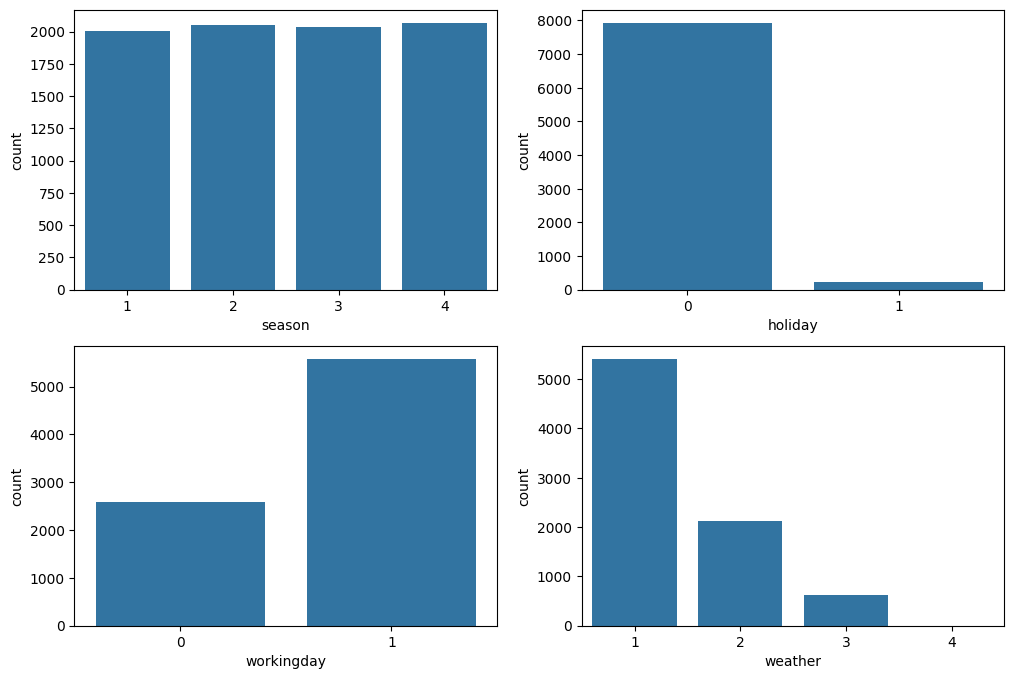

In [13]:

# Count plots for categorical features
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.countplot(x='season', data=train_data)

plt.subplot(2, 2, 2)
sns.countplot(x='holiday', data=train_data)

plt.subplot(2, 2, 3)
sns.countplot(x='workingday', data=train_data)

plt.subplot(2, 2, 4)
sns.countplot(x='weather', data=train_data)

plt.show()

In [14]:
# Convert 'datetime' to datetime type
train_data['datetime'] = pd.to_datetime(train_data['datetime'])

In [15]:
train_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pollution,sunlight,traffic
0,2011-07-11 00:00:00,3,0,1,1,28.70,32.575,65,12.9980,5.354100,28.701,0.000000
1,2012-05-18 22:00:00,2,0,1,1,22.96,26.515,52,22.0028,85.425233,22.961,0.004489
2,2011-04-01 23:00:00,2,0,1,1,12.30,15.910,61,6.0032,2.040899,12.301,0.000242
3,2012-09-16 09:00:00,3,0,0,1,23.78,27.275,60,8.9981,26.682772,23.781,0.004489
4,2011-02-01 23:00:00,1,0,1,3,8.20,9.850,93,12.9980,5.851754,8.201,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
8159,2012-01-14 02:00:00,1,0,0,1,6.56,8.335,47,11.0014,14.953355,6.561,0.004489
8160,2011-12-10 09:00:00,4,0,0,1,11.48,12.880,61,19.0012,7.977025,11.481,0.000000
8161,2011-12-18 16:00:00,4,0,0,1,11.48,13.635,48,16.9979,6.916512,11.481,0.015615
8162,2011-02-19 07:00:00,1,0,0,1,15.58,19.695,17,35.0008,0.095445,15.581,0.000242


In [17]:
train_data.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
pollution            float64
sunlight             float64
traffic              float64
dtype: object

KeyboardInterrupt: 

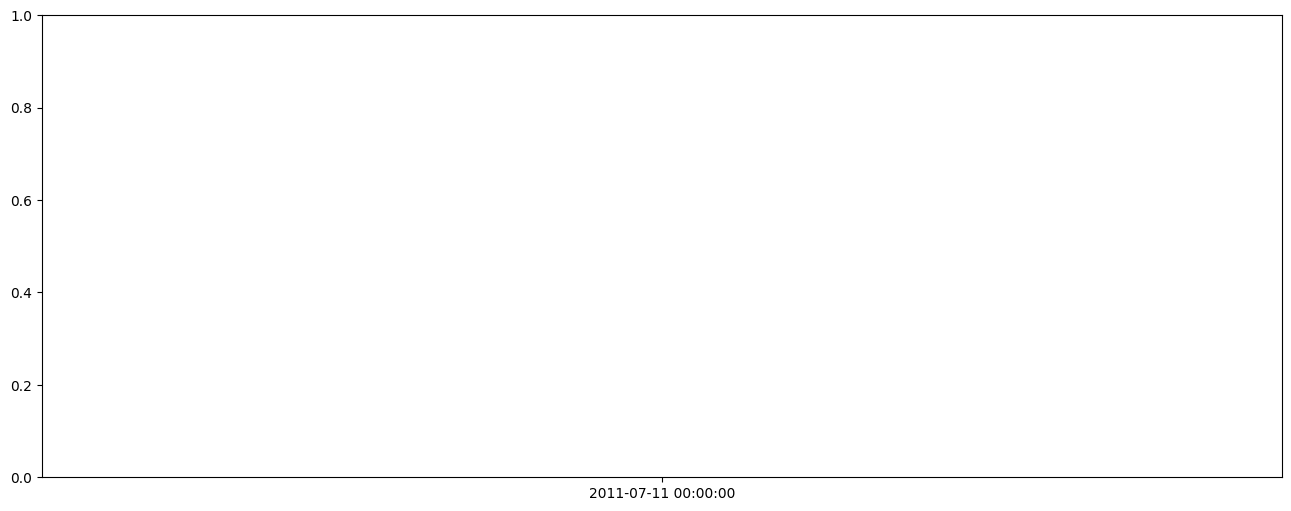

In [21]:
# Line plot for bike rentals over time
plt.figure(figsize=(16, 6))
plt.plot(train_with_labels['datetime'], train_with_labels['count'])
plt.title('Bike Rentals Over Time')
plt.xlabel('Datetime')
plt.ylabel('Count')
plt.show()

In [20]:
train_data.info

<bound method DataFrame.info of                 datetime  season  holiday  workingday  weather   temp   atemp  \
0    2011-07-11 00:00:00       3        0           1        1  28.70  32.575   
1    2012-05-18 22:00:00       2        0           1        1  22.96  26.515   
2    2011-04-01 23:00:00       2        0           1        1  12.30  15.910   
3    2012-09-16 09:00:00       3        0           0        1  23.78  27.275   
4    2011-02-01 23:00:00       1        0           1        3   8.20   9.850   
...                  ...     ...      ...         ...      ...    ...     ...   
8159 2012-01-14 02:00:00       1        0           0        1   6.56   8.335   
8160 2011-12-10 09:00:00       4        0           0        1  11.48  12.880   
8161 2011-12-18 16:00:00       4        0           0        1  11.48  13.635   
8162 2011-02-19 07:00:00       1        0           0        1  15.58  19.695   
8163 2012-05-02 07:00:00       2        0           1        2  22.14  25.760

## Preprocessing

In [ ]:
full_train_data_copy = full_train_data.copy()

labels = full_train_data_copy['count']
data = full_train_data_copy.drop('count', axis=1)

# Train split to train and validation with fixed random state (42) to ensure reproducibility
train_data, validation_data, train_labels, validation_labels = train_test_split(data, labels, test_size=0.2, random_state = 42, shuffle = True)

# Save copies in order to have a clean data set to use in the final preprocessing function
# (when pipelining all the functions from start to end)
train_data_ppc = train_data.copy()
train_lables_ppc = train_labels.copy()

validation_data_ppc = validation_data.copy()
validation_labels_ppc = validation_labels.copy()

  ### Handling Missing Values


In [ ]:
# Example of a function implementation and call
def handle_corr_missing_values(train_data, test_data):
  pass


In [ ]:
train_data, validation_data = handle_corr_missing_values(train_data, validation_data)

In [ ]:
# Handle missing values function
def handle_missing_values(train_data, test_data):
    train_data, test_data = handle_corr_missing_values(train_data, test_data)
    train_data, test_data = handle_rest_missing_values(train_data, test_data)
    return train_data, test_data

### Add New Features

In [ ]:
def adding_new_feature(data):
    #....

    return data

In [ ]:
train_data = adding_new_feature(train_data)
validationv_data = adding_new_feature(validation_data)

In [ ]:
train_data.head()

In [ ]:
validation_data.head()

  ### Handling Categorial Features


In [ ]:
def handle_categorial_features(train_data, test_data):

    train_data, remaining_categories = reducing_category_types(train_data)
    test_data = apply_remaining_categories_for_test(test_data, remaining_categories)

    train_data = categorical_variables_spread(train_data)
    test_data = categorical_variables_spread(test_data)

    return train_data, test_data

In [ ]:
train_data, validation_data = handle_categorial_features(train_data, validation_data)

  ### Handling Outliers


In [ ]:
def handle_outliers(train_data, train_labels, test_data):

    train_data, bounds = handle_ND_outliers_train(train_data)
    test_data = handle_ND_outliers_test(test_data, bounds)

    contamination = 0.001
    threshold = 0.001
    train_data, train_labels = handle_NND_outliers_train(train_data, train_labels, threshold, contamination)

    return train_data, train_labels, test_data

In [ ]:
train_data, train_labels, validation_data = handle_outliers(train_data, train_labels, validation_data)

  ### Large Dimensionality


##### `How will we recognize that the dimensions of the problem are too large?`

In order to assess as the dimensionality of the problem to a higher degree we can use the following steps:<br>

- Compute the Feature-to-Sample Ratio: Calculate the ratio of the number of features to the number of samples. If this ratio is significantly large, it might indicate a high-dimensional problem.

- Explore Feature Sparsity: Analyze the sparsity of our features. If a significant number of features have a high percentage of zero or near-zero values, it may indicate a high-dimensional problem.

- Assess Feature Redundancy: Determine the level of redundancy among the features. Redundant features provide similar or redundant information, which can increase dimensionality without adding valuable insights. (correlated features removal)

- Consider Feature Importance: Evaluate the importance or relevance of each feature in relation to the target variable (if available).

- Assess Computational Complexity: Take into account the computational resources and time required to handle high-dimensional data. Some algorithms may become computationally expensive or impractical to run with a large number of features.

- Evaluate Model Performance: Train and evaluate models using different subsets of features to assess their impact on model performance. If the performance remains consistent despite reducing the number of features, it may indicate high dimensionality.

  ### Data Normalizing


In [ ]:
def normalize_data(train_data, test_data):

    selected_features = ['size', 'vsize', 'numstrings', 'printables', 'A','imports', 'exports', 'symbols', 'paths', 'urls', 'registry', 'MZ', 'avlength', 'proportion_imports', 'file_type_prob_trid', 'B']

    train_data, scaler = normalize_data_train(train_data, selected_features)
    test_data = normalize_data_test(test_data, scaler, selected_features)

    return train_data, test_data

In [ ]:
train_data, validation_data = normalize_data(train_data, validation_data)

  ### Dimensionality Reduction

In [ ]:
def remove_features(data):
    features_to_remove = ['registry', 'size', 'MZ']
    data_selected = data.drop(features_to_remove, axis=1)
    return data_selected

In [ ]:
train_data = remove_features(train_data)
validation_data = remove_features(validation_data)

### Final Preprocessing Function

Now, after deciding what manipulations we will do on the train data (Outliers removal, Normalization, Missing values handling, Categorial data handling, Feature selection and Feature manipulation), we will create a generic preprocess function to run it all at once.

In [ ]:
def preprocess_data_ALL(train_data, train_labels, test_data):

    # Missing Values Handling
    train_data, test_data = handle_missing_values(train_data, test_data)

    # Add feature - 'proportion_imports'
    train_data = adding_new_feature(train_data)
    test_data = adding_new_feature(test_data)

    # Categorical Data Handling
    train_data, test_data = handle_categorial_features(train_data, test_data)

    # Outliers Removal
    train_data, train_labels, test_data = handle_outliers(train_data, train_labels, test_data)

    # Normalization
    train_data, test_data = normalize_data(train_data, test_data)

    # Feature Reduction
    train_data = remove_features(train_data)
    test_data = remove_features(test_data)

    # PCA
    # train_data, test_data = perform_pca(train_data, test_data, 0.99)

    return train_data, train_labels, test_data

In [ ]:
# Applying all the preprocessing decisions at once from start to end
preprocessed_train_data, preprocessed_train_labels, preprocessed_validation_data = preprocess_data_ALL(train_data_ppc, train_lables_ppc, validation_data_ppc)
preprocessed_validation_labels = test_labels_ppc.copy()

## Running the Models

## Evaluation of the Models

## Prediction



1.   List item
2.   List item



## *Output*

צריך למלא את זה לפי מה שיצא לנו!!!


In [ ]:
import pandas as pd
# Keep keys the same, and replace values according to your results and the specified type

results = {'model': ['string1', 'string2', 'string3'],
           'Score (RMSE)': ['string1', 'string2', 'string3'],
           'Hyperparams used': [['list1'], ['list2'], ['list3']],
           'Features dropped': [['list1'], ['list2'], ['list3']],
           'New features created': [['list1'], ['list2'], ['list3']],
           'Runtime trainining + inference (seconds)': ['int1', 'int2', 'int3'],
           'Hardware used (GPU/CPU/TPU)': ['string1', 'string2', 'string3'],
           'Explainability (top 3 features)': [['list1'], ['list2'], ['list3']]
           }

df = pd.DataFrame(results)
df

In [ ]:
df.to_csv(os.path.join(os.getcwd(), 'example.csv'))

In [ ]:
#בדיקת המודל

import numpy as np
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))